In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

In [64]:
class NeuralNetwork:
    W = None
    V = None
    hidden_size = None
    beta3 = None
    beta2 = None
    err = None
    
    def __init__(self,hidden_size,input_dim=2,output_dim=1):
        self.err = []
        self.hidden_size = hidden_size
        self.input_dim = input_dim
        self.output_dim = output_dim
        #weights from input layer to hidden layer
        self.W = np.random.rand(hidden_size,input_dim+1)
        #weights from hidden layer to output layer
        self.V = np.random.rand(output_dim,hidden_size+1)
        #print(self.W);print(self.V)

    def predict(self, X):
        a1 = np.append(X,np.ones((X.shape[0],1)),axis=1).T
        z2 = np.matmul(self.W,a1)
        a2 = np.append(self.sigmoid(z2),np.ones((1,z2.shape[1])),axis=0)
        z3 = np.matmul(self.V,a2)
        a3 = np.array(self.sigmoid(z3))      
        return np.array([[self.maximize(x) for x in a3[0]]])

    def maximize(_,x):
        if(x>=0.5): return 1
        return 0
    
    def sigmoid_d(self,x):
        return np.multiply(self.sigmoid(x),np.subtract(np.array([1]),self.sigmoid(x)))
    
    def sigmoid(_,x):
        return 1 / (1 + np.exp(-x))
    
    def error(self,predicted,actual):
        predicted[predicted==0]=0.0000001
        predicted[predicted==1]=0.9999999
        return -((1-actual)*np.log(1-predicted)+actual*np.log(predicted))
        
    def make1hot(self,val):
        x = np.zeros((self.output_dim,1))
        x[val]=1
        return x
    
    def fit(self,epochs,alpha,X,y):
        for e in range(0,epochs):
            #print(self.V.shape)
            #forward prop
            a1 = np.append(X,np.ones((X.shape[0],1)),axis=1).T
            z2 = np.matmul(self.W,a1)
            a2 = np.append(self.sigmoid(z2),np.ones((1,z2.shape[1])),axis=0)
            z3 = np.matmul(self.V,a2)
            a3 = np.array(self.sigmoid(z3))
            
            predicted = a3                
            #print(a3.shape)
            #backward prop
            beta3 = np.subtract(a3,y)#regularization:+np.sum(np.multiply(alpha,self.V))
            gradient2 = np.matmul(a2,beta3.T)
            self.V = np.subtract(self.V,alpha*gradient2.T)
            
            beta2 = np.dot(np.matmul(self.V.T,beta3),self.sigmoid_d(z2).T) 
            
            if(e%100==0): 
                self.err.append(np.sum(self.error(predicted,y)))#print(err/(X.size/2))

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr,alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

1.0


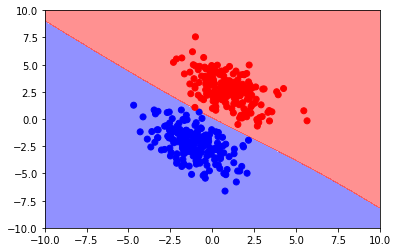

In [61]:
#Linear Data Set

X = np.genfromtxt('DATA/data_linearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_linearY.csv', delimiter=',').astype(np.int64)
#print(X.shape)
num_samples = X.size/2
epochs = 10000
alpha = .001
hidden_size = 8

samplesize = (int)(num_samples/5)

NN = NeuralNetwork(hidden_size,input_dim=2,output_dim=1)
NN.fit(epochs,alpha,X[:samplesize*4],y[:samplesize*4])


predicted = NN.predict(X[samplesize*4:])
actual = y[samplesize*4:]

acc=0
for i in range (0,actual.size):
    if((predicted[0][i]>=0.5 and actual[i]==1) or (predicted[0][i] < 0.5 and actual[i]==0)):
        acc+=1
    

acc = acc/actual.size
print(acc)

plot_decision_boundary(NN,X[samplesize*4:],actual)

0.985


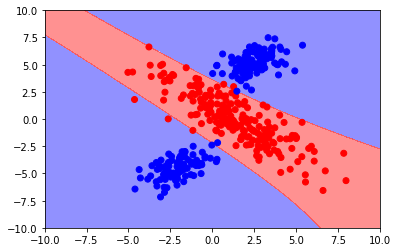

In [78]:
#Non-Linear Data Set

X = np.genfromtxt('DATA/data_nonlinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonlinearY.csv', delimiter=',').astype(np.int64)
#print(X.shape)
num_samples = X.size/2
epochs = 10000
alpha = .001
hidden_size = 8

samplesize = (int)(num_samples/5)

NN = NeuralNetwork(hidden_size,input_dim=2,output_dim=1)
NN.fit(epochs,alpha,X[:samplesize*4],y[:samplesize*4])


predicted = NN.predict(X[samplesize*4:])
actual = y[samplesize*4:]

acc=0
for i in range (0,actual.size):
    if((predicted[0][i]>=0.5 and actual[i]==1) or (predicted[0][i] < 0.5 and actual[i]==0)):
        acc+=1
    

acc = acc/actual.size
print(acc)

plot_decision_boundary(NN,X[samplesize*4:],actual)

In [73]:
#Confusion matrix with K-Fold Cross Validation
K = 5

num_samples = X.size/2
samplesize = (int)(num_samples/K)
conmat = np.zeros((2,2))
epochs = 10000
alpha = 0.001
for k in range(K):    
    testSetX = (X[samplesize*k:samplesize*(k+1)])
    testSety = (y[samplesize*k:samplesize*(k+1)])
    if(k>0):
        
        trainSetX = np.append(X[:samplesize*k],X[samplesize*(k+1):],axis=0)
        trainSety = np.append(y[:samplesize*k],y[samplesize*(k+1):],axis=0)
    else:
        trainSetX = X[samplesize*(k+1):]
        trainSety = y[samplesize*(k+1):]
        
    network = NeuralNetwork(8,input_dim=2,output_dim=1)
    network.fit(epochs,alpha,trainSetX,trainSety)
    predicted = network.predict(testSetX)
    actual = testSety
    for i in range(actual.size):
        conmat[1-predicted[0][i]][1-actual[i]]+=1


print("acc",(conmat[0][0]+conmat[1][1])/np.sum(conmat))    

print(conmat)

acc 0.9985
[[999.   2.]
 [  1. 998.]]


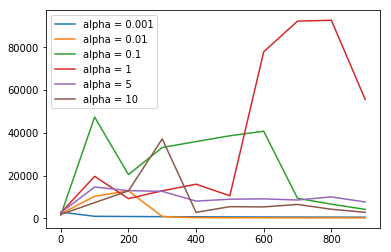

In [81]:
#Learning Rate Variations
rates = [0.001,0.01,0.1,1,5,10]
epochs = 1000
x_axis = np.arange(0,epochs,100)
plt.clf()
for r in rates:
    network = NeuralNetwork(8,input_dim=2,output_dim=1)
    l = "alpha = "+str(r)
    network.fit(epochs,r,X[:samplesize*4],y[:samplesize*4])
    plt.plot(x_axis,network.err,label=l)
plt.legend()
plt.show()